In [2]:
%load_ext autoreload
%autoreload 2
from sbrnet_core.sbrnet.models.model import SBRNet
from sbrnet_core.config_loader import load_config

import torch
import matplotlib.pyplot as plt


In [3]:
from pandas import read_parquet
from tifffile import imread
view_ind = 15
p = f'/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/{view_ind}/metadata.pq'
df = read_parquet(p)
df["gt_path"].iloc[0]
df["stack_scat_path"].iloc[0]
# im = imread(df["rfv_scat_path"].iloc[0])
# im.max()

'/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/15/stack_scattering/meas_0.tiff'

In [12]:
path = 'trained_models/sbrnet_view_15_v2.pt'
%load_ext autoreload
%autoreload 2
from sbrnet_core.sbrnet.dataset import CustomDataset
from sbrnet_core.sbrnet.models.model import SBRNet
import torch
view_ind = 15
config = {
    "dataset_pq": f"/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/{view_ind}/metadata.pq",
    "scattering": "scat",
    "train_split": 0.8,
    "batch_size": 16,
    "learning_rate": 0.001,
    "epochs": 20000,
    "backbone": "resnet",
    "resnet_channels": 48,
    "weight_init": "kaiming_normal",
    "random_seed": 42,
    "optimizer": "adam",
    "criterion_name": "bce_with_logits",
    "use_amp": True,
    "lr_scheduler": "cosine_annealing_with_warm_restarts",
    "weight_decay": 0.001,
    "cosine_annealing_T_max": 100,
    "q_lo": 0.05,
    "q_hi": 0.95,
    "num_gt_layers": 24,
    "num_rfv_layers": 24,
    "num_resblocks": 20,
    "patch_size": 224,
    "use_quantile_layer": True,
    "num_head_layers": 3,
    "view_ind": view_ind,
    "batch_size": 20
}

cal_data = CustomDataset(config)
model = SBRNet(config)
checkpoint = torch.load(f'/projectnb/tianlabdl/jalido/sbrnet_proj/trained_models/sbrnet_view_{view_ind}_v2.pt',map_location=torch.device('cpu'))
mod_state_dict = checkpoint['model_state_dict']
for key in list(mod_state_dict.keys()):
    mod_state_dict[key.replace("_orig_mod.", "")] = mod_state_dict.pop(key)
model.load_state_dict(mod_state_dict)
# lambdas = algorithm(cal_data=cal_data, model=model, alpha=0.1, delta=0.1, lamb_0=2*torch.ones(24).cuda(), d_lamb=0.08, params=config)
# lambdas


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RuntimeError: Error(s) in loading state_dict for SBRNet:
	Missing key(s) in state_dict: "trunk.view_synthesis_branch.1.0.bias", "trunk.view_synthesis_branch.1.0.running_mean", "trunk.view_synthesis_branch.1.0.running_var", "trunk.view_synthesis_branch.1.1.0.weight", "trunk.view_synthesis_branch.1.1.2.weight", "trunk.view_synthesis_branch.1.1.2.bias", "trunk.view_synthesis_branch.1.1.2.running_mean", "trunk.view_synthesis_branch.1.1.2.running_var", "trunk.view_synthesis_branch.1.1.3.weight", "trunk.view_synthesis_branch.2.0.bias", "trunk.view_synthesis_branch.2.0.running_mean", "trunk.view_synthesis_branch.2.0.running_var", "trunk.view_synthesis_branch.2.1.0.weight", "trunk.view_synthesis_branch.2.1.2.weight", "trunk.view_synthesis_branch.2.1.2.bias", "trunk.view_synthesis_branch.2.1.2.running_mean", "trunk.view_synthesis_branch.2.1.2.running_var", "trunk.view_synthesis_branch.2.1.3.weight", "trunk.view_synthesis_branch.3.0.bias", "trunk.view_synthesis_branch.3.0.running_mean", "trunk.view_synthesis_branch.3.0.running_var", "trunk.view_synthesis_branch.3.1.0.weight", "trunk.view_synthesis_branch.3.1.2.weight", "trunk.view_synthesis_branch.3.1.2.bias", "trunk.view_synthesis_branch.3.1.2.running_mean", "trunk.view_synthesis_branch.3.1.2.running_var", "trunk.view_synthesis_branch.3.1.3.weight", "trunk.view_synthesis_branch.4.0.bias", "trunk.view_synthesis_branch.4.0.running_mean", "trunk.view_synthesis_branch.4.0.running_var", "trunk.view_synthesis_branch.4.1.0.weight", "trunk.view_synthesis_branch.4.1.2.weight", "trunk.view_synthesis_branch.4.1.2.bias", "trunk.view_synthesis_branch.4.1.2.running_mean", "trunk.view_synthesis_branch.4.1.2.running_var", "trunk.view_synthesis_branch.4.1.3.weight", "trunk.view_synthesis_branch.5.0.bias", "trunk.view_synthesis_branch.5.0.running_mean", "trunk.view_synthesis_branch.5.0.running_var", "trunk.view_synthesis_branch.5.1.0.weight", "trunk.view_synthesis_branch.5.1.2.weight", "trunk.view_synthesis_branch.5.1.2.bias", "trunk.view_synthesis_branch.5.1.2.running_mean", "trunk.view_synthesis_branch.5.1.2.running_var", "trunk.view_synthesis_branch.5.1.3.weight", "trunk.view_synthesis_branch.6.0.bias", "trunk.view_synthesis_branch.6.0.running_mean", "trunk.view_synthesis_branch.6.0.running_var", "trunk.view_synthesis_branch.6.1.0.weight", "trunk.view_synthesis_branch.6.1.2.weight", "trunk.view_synthesis_branch.6.1.2.bias", "trunk.view_synthesis_branch.6.1.2.running_mean", "trunk.view_synthesis_branch.6.1.2.running_var", "trunk.view_synthesis_branch.6.1.3.weight", "trunk.view_synthesis_branch.7.0.bias", "trunk.view_synthesis_branch.7.0.running_mean", "trunk.view_synthesis_branch.7.0.running_var", "trunk.view_synthesis_branch.7.1.0.weight", "trunk.view_synthesis_branch.7.1.2.weight", "trunk.view_synthesis_branch.7.1.2.bias", "trunk.view_synthesis_branch.7.1.2.running_mean", "trunk.view_synthesis_branch.7.1.2.running_var", "trunk.view_synthesis_branch.7.1.3.weight", "trunk.view_synthesis_branch.8.0.bias", "trunk.view_synthesis_branch.8.0.running_mean", "trunk.view_synthesis_branch.8.0.running_var", "trunk.view_synthesis_branch.8.1.0.weight", "trunk.view_synthesis_branch.8.1.2.weight", "trunk.view_synthesis_branch.8.1.2.bias", "trunk.view_synthesis_branch.8.1.2.running_mean", "trunk.view_synthesis_branch.8.1.2.running_var", "trunk.view_synthesis_branch.8.1.3.weight", "trunk.view_synthesis_branch.9.0.bias", "trunk.view_synthesis_branch.9.0.running_mean", "trunk.view_synthesis_branch.9.0.running_var", "trunk.view_synthesis_branch.9.1.0.weight", "trunk.view_synthesis_branch.9.1.2.weight", "trunk.view_synthesis_branch.9.1.2.bias", "trunk.view_synthesis_branch.9.1.2.running_mean", "trunk.view_synthesis_branch.9.1.2.running_var", "trunk.view_synthesis_branch.9.1.3.weight", "trunk.view_synthesis_branch.10.0.bias", "trunk.view_synthesis_branch.10.0.running_mean", "trunk.view_synthesis_branch.10.0.running_var", "trunk.view_synthesis_branch.10.1.0.weight", "trunk.view_synthesis_branch.10.1.2.weight", "trunk.view_synthesis_branch.10.1.2.bias", "trunk.view_synthesis_branch.10.1.2.running_mean", "trunk.view_synthesis_branch.10.1.2.running_var", "trunk.view_synthesis_branch.10.1.3.weight", "trunk.view_synthesis_branch.11.0.bias", "trunk.view_synthesis_branch.11.0.running_mean", "trunk.view_synthesis_branch.11.0.running_var", "trunk.view_synthesis_branch.11.1.0.weight", "trunk.view_synthesis_branch.11.1.2.weight", "trunk.view_synthesis_branch.11.1.2.bias", "trunk.view_synthesis_branch.11.1.2.running_mean", "trunk.view_synthesis_branch.11.1.2.running_var", "trunk.view_synthesis_branch.11.1.3.weight", "trunk.view_synthesis_branch.12.0.bias", "trunk.view_synthesis_branch.12.0.running_mean", "trunk.view_synthesis_branch.12.0.running_var", "trunk.view_synthesis_branch.12.1.0.weight", "trunk.view_synthesis_branch.12.1.2.weight", "trunk.view_synthesis_branch.12.1.2.bias", "trunk.view_synthesis_branch.12.1.2.running_mean", "trunk.view_synthesis_branch.12.1.2.running_var", "trunk.view_synthesis_branch.12.1.3.weight", "trunk.view_synthesis_branch.13.0.bias", "trunk.view_synthesis_branch.13.0.running_mean", "trunk.view_synthesis_branch.13.0.running_var", "trunk.view_synthesis_branch.13.1.0.weight", "trunk.view_synthesis_branch.13.1.2.weight", "trunk.view_synthesis_branch.13.1.2.bias", "trunk.view_synthesis_branch.13.1.2.running_mean", "trunk.view_synthesis_branch.13.1.2.running_var", "trunk.view_synthesis_branch.13.1.3.weight", "trunk.view_synthesis_branch.14.0.bias", "trunk.view_synthesis_branch.14.0.running_mean", "trunk.view_synthesis_branch.14.0.running_var", "trunk.view_synthesis_branch.14.1.0.weight", "trunk.view_synthesis_branch.14.1.2.weight", "trunk.view_synthesis_branch.14.1.2.bias", "trunk.view_synthesis_branch.14.1.2.running_mean", "trunk.view_synthesis_branch.14.1.2.running_var", "trunk.view_synthesis_branch.14.1.3.weight", "trunk.view_synthesis_branch.15.0.bias", "trunk.view_synthesis_branch.15.0.running_mean", "trunk.view_synthesis_branch.15.0.running_var", "trunk.view_synthesis_branch.15.1.0.weight", "trunk.view_synthesis_branch.15.1.2.weight", "trunk.view_synthesis_branch.15.1.2.bias", "trunk.view_synthesis_branch.15.1.2.running_mean", "trunk.view_synthesis_branch.15.1.2.running_var", "trunk.view_synthesis_branch.15.1.3.weight", "trunk.view_synthesis_branch.16.0.bias", "trunk.view_synthesis_branch.16.0.running_mean", "trunk.view_synthesis_branch.16.0.running_var", "trunk.view_synthesis_branch.16.1.0.weight", "trunk.view_synthesis_branch.16.1.2.weight", "trunk.view_synthesis_branch.16.1.2.bias", "trunk.view_synthesis_branch.16.1.2.running_mean", "trunk.view_synthesis_branch.16.1.2.running_var", "trunk.view_synthesis_branch.16.1.3.weight", "trunk.view_synthesis_branch.17.0.bias", "trunk.view_synthesis_branch.17.0.running_mean", "trunk.view_synthesis_branch.17.0.running_var", "trunk.view_synthesis_branch.17.1.0.weight", "trunk.view_synthesis_branch.17.1.2.weight", "trunk.view_synthesis_branch.17.1.2.bias", "trunk.view_synthesis_branch.17.1.2.running_mean", "trunk.view_synthesis_branch.17.1.2.running_var", "trunk.view_synthesis_branch.17.1.3.weight", "trunk.view_synthesis_branch.18.0.bias", "trunk.view_synthesis_branch.18.0.running_mean", "trunk.view_synthesis_branch.18.0.running_var", "trunk.view_synthesis_branch.18.1.0.weight", "trunk.view_synthesis_branch.18.1.2.weight", "trunk.view_synthesis_branch.18.1.2.bias", "trunk.view_synthesis_branch.18.1.2.running_mean", "trunk.view_synthesis_branch.18.1.2.running_var", "trunk.view_synthesis_branch.18.1.3.weight", "trunk.view_synthesis_branch.19.0.bias", "trunk.view_synthesis_branch.19.0.running_mean", "trunk.view_synthesis_branch.19.0.running_var", "trunk.view_synthesis_branch.19.1.0.weight", "trunk.view_synthesis_branch.19.1.2.weight", "trunk.view_synthesis_branch.19.1.2.bias", "trunk.view_synthesis_branch.19.1.2.running_mean", "trunk.view_synthesis_branch.19.1.2.running_var", "trunk.view_synthesis_branch.19.1.3.weight", "trunk.view_synthesis_branch.20.0.bias", "trunk.view_synthesis_branch.20.0.running_mean", "trunk.view_synthesis_branch.20.0.running_var", "trunk.view_synthesis_branch.20.1.0.weight", "trunk.view_synthesis_branch.20.1.2.weight", "trunk.view_synthesis_branch.20.1.2.bias", "trunk.view_synthesis_branch.20.1.2.running_mean", "trunk.view_synthesis_branch.20.1.2.running_var", "trunk.view_synthesis_branch.20.1.3.weight", "trunk.rfv_branch.1.0.bias", "trunk.rfv_branch.1.0.running_mean", "trunk.rfv_branch.1.0.running_var", "trunk.rfv_branch.1.1.0.weight", "trunk.rfv_branch.1.1.2.weight", "trunk.rfv_branch.1.1.2.bias", "trunk.rfv_branch.1.1.2.running_mean", "trunk.rfv_branch.1.1.2.running_var", "trunk.rfv_branch.1.1.3.weight", "trunk.rfv_branch.2.0.bias", "trunk.rfv_branch.2.0.running_mean", "trunk.rfv_branch.2.0.running_var", "trunk.rfv_branch.2.1.0.weight", "trunk.rfv_branch.2.1.2.weight", "trunk.rfv_branch.2.1.2.bias", "trunk.rfv_branch.2.1.2.running_mean", "trunk.rfv_branch.2.1.2.running_var", "trunk.rfv_branch.2.1.3.weight", "trunk.rfv_branch.3.0.bias", "trunk.rfv_branch.3.0.running_mean", "trunk.rfv_branch.3.0.running_var", "trunk.rfv_branch.3.1.0.weight", "trunk.rfv_branch.3.1.2.weight", "trunk.rfv_branch.3.1.2.bias", "trunk.rfv_branch.3.1.2.running_mean", "trunk.rfv_branch.3.1.2.running_var", "trunk.rfv_branch.3.1.3.weight", "trunk.rfv_branch.4.0.bias", "trunk.rfv_branch.4.0.running_mean", "trunk.rfv_branch.4.0.running_var", "trunk.rfv_branch.4.1.0.weight", "trunk.rfv_branch.4.1.2.weight", "trunk.rfv_branch.4.1.2.bias", "trunk.rfv_branch.4.1.2.running_mean", "trunk.rfv_branch.4.1.2.running_var", "trunk.rfv_branch.4.1.3.weight", "trunk.rfv_branch.5.0.bias", "trunk.rfv_branch.5.0.running_mean", "trunk.rfv_branch.5.0.running_var", "trunk.rfv_branch.5.1.0.weight", "trunk.rfv_branch.5.1.2.weight", "trunk.rfv_branch.5.1.2.bias", "trunk.rfv_branch.5.1.2.running_mean", "trunk.rfv_branch.5.1.2.running_var", "trunk.rfv_branch.5.1.3.weight", "trunk.rfv_branch.6.0.bias", "trunk.rfv_branch.6.0.running_mean", "trunk.rfv_branch.6.0.running_var", "trunk.rfv_branch.6.1.0.weight", "trunk.rfv_branch.6.1.2.weight", "trunk.rfv_branch.6.1.2.bias", "trunk.rfv_branch.6.1.2.running_mean", "trunk.rfv_branch.6.1.2.running_var", "trunk.rfv_branch.6.1.3.weight", "trunk.rfv_branch.7.0.bias", "trunk.rfv_branch.7.0.running_mean", "trunk.rfv_branch.7.0.running_var", "trunk.rfv_branch.7.1.0.weight", "trunk.rfv_branch.7.1.2.weight", "trunk.rfv_branch.7.1.2.bias", "trunk.rfv_branch.7.1.2.running_mean", "trunk.rfv_branch.7.1.2.running_var", "trunk.rfv_branch.7.1.3.weight", "trunk.rfv_branch.8.0.bias", "trunk.rfv_branch.8.0.running_mean", "trunk.rfv_branch.8.0.running_var", "trunk.rfv_branch.8.1.0.weight", "trunk.rfv_branch.8.1.2.weight", "trunk.rfv_branch.8.1.2.bias", "trunk.rfv_branch.8.1.2.running_mean", "trunk.rfv_branch.8.1.2.running_var", "trunk.rfv_branch.8.1.3.weight", "trunk.rfv_branch.9.0.bias", "trunk.rfv_branch.9.0.running_mean", "trunk.rfv_branch.9.0.running_var", "trunk.rfv_branch.9.1.0.weight", "trunk.rfv_branch.9.1.2.weight", "trunk.rfv_branch.9.1.2.bias", "trunk.rfv_branch.9.1.2.running_mean", "trunk.rfv_branch.9.1.2.running_var", "trunk.rfv_branch.9.1.3.weight", "trunk.rfv_branch.10.0.bias", "trunk.rfv_branch.10.0.running_mean", "trunk.rfv_branch.10.0.running_var", "trunk.rfv_branch.10.1.0.weight", "trunk.rfv_branch.10.1.2.weight", "trunk.rfv_branch.10.1.2.bias", "trunk.rfv_branch.10.1.2.running_mean", "trunk.rfv_branch.10.1.2.running_var", "trunk.rfv_branch.10.1.3.weight", "trunk.rfv_branch.11.0.bias", "trunk.rfv_branch.11.0.running_mean", "trunk.rfv_branch.11.0.running_var", "trunk.rfv_branch.11.1.0.weight", "trunk.rfv_branch.11.1.2.weight", "trunk.rfv_branch.11.1.2.bias", "trunk.rfv_branch.11.1.2.running_mean", "trunk.rfv_branch.11.1.2.running_var", "trunk.rfv_branch.11.1.3.weight", "trunk.rfv_branch.12.0.bias", "trunk.rfv_branch.12.0.running_mean", "trunk.rfv_branch.12.0.running_var", "trunk.rfv_branch.12.1.0.weight", "trunk.rfv_branch.12.1.2.weight", "trunk.rfv_branch.12.1.2.bias", "trunk.rfv_branch.12.1.2.running_mean", "trunk.rfv_branch.12.1.2.running_var", "trunk.rfv_branch.12.1.3.weight", "trunk.rfv_branch.13.0.bias", "trunk.rfv_branch.13.0.running_mean", "trunk.rfv_branch.13.0.running_var", "trunk.rfv_branch.13.1.0.weight", "trunk.rfv_branch.13.1.2.weight", "trunk.rfv_branch.13.1.2.bias", "trunk.rfv_branch.13.1.2.running_mean", "trunk.rfv_branch.13.1.2.running_var", "trunk.rfv_branch.13.1.3.weight", "trunk.rfv_branch.14.0.bias", "trunk.rfv_branch.14.0.running_mean", "trunk.rfv_branch.14.0.running_var", "trunk.rfv_branch.14.1.0.weight", "trunk.rfv_branch.14.1.2.weight", "trunk.rfv_branch.14.1.2.bias", "trunk.rfv_branch.14.1.2.running_mean", "trunk.rfv_branch.14.1.2.running_var", "trunk.rfv_branch.14.1.3.weight", "trunk.rfv_branch.15.0.bias", "trunk.rfv_branch.15.0.running_mean", "trunk.rfv_branch.15.0.running_var", "trunk.rfv_branch.15.1.0.weight", "trunk.rfv_branch.15.1.2.weight", "trunk.rfv_branch.15.1.2.bias", "trunk.rfv_branch.15.1.2.running_mean", "trunk.rfv_branch.15.1.2.running_var", "trunk.rfv_branch.15.1.3.weight", "trunk.rfv_branch.16.0.bias", "trunk.rfv_branch.16.0.running_mean", "trunk.rfv_branch.16.0.running_var", "trunk.rfv_branch.16.1.0.weight", "trunk.rfv_branch.16.1.2.weight", "trunk.rfv_branch.16.1.2.bias", "trunk.rfv_branch.16.1.2.running_mean", "trunk.rfv_branch.16.1.2.running_var", "trunk.rfv_branch.16.1.3.weight", "trunk.rfv_branch.17.0.bias", "trunk.rfv_branch.17.0.running_mean", "trunk.rfv_branch.17.0.running_var", "trunk.rfv_branch.17.1.0.weight", "trunk.rfv_branch.17.1.2.weight", "trunk.rfv_branch.17.1.2.bias", "trunk.rfv_branch.17.1.2.running_mean", "trunk.rfv_branch.17.1.2.running_var", "trunk.rfv_branch.17.1.3.weight", "trunk.rfv_branch.18.0.bias", "trunk.rfv_branch.18.0.running_mean", "trunk.rfv_branch.18.0.running_var", "trunk.rfv_branch.18.1.0.weight", "trunk.rfv_branch.18.1.2.weight", "trunk.rfv_branch.18.1.2.bias", "trunk.rfv_branch.18.1.2.running_mean", "trunk.rfv_branch.18.1.2.running_var", "trunk.rfv_branch.18.1.3.weight", "trunk.rfv_branch.19.0.bias", "trunk.rfv_branch.19.0.running_mean", "trunk.rfv_branch.19.0.running_var", "trunk.rfv_branch.19.1.0.weight", "trunk.rfv_branch.19.1.2.weight", "trunk.rfv_branch.19.1.2.bias", "trunk.rfv_branch.19.1.2.running_mean", "trunk.rfv_branch.19.1.2.running_var", "trunk.rfv_branch.19.1.3.weight", "trunk.rfv_branch.20.0.bias", "trunk.rfv_branch.20.0.running_mean", "trunk.rfv_branch.20.0.running_var", "trunk.rfv_branch.20.1.0.weight", "trunk.rfv_branch.20.1.2.weight", "trunk.rfv_branch.20.1.2.bias", "trunk.rfv_branch.20.1.2.running_mean", "trunk.rfv_branch.20.1.2.running_var", "trunk.rfv_branch.20.1.3.weight". 
	Unexpected key(s) in state_dict: "trunk.view_synthesis_branch.1.3.weight", "trunk.view_synthesis_branch.1.4.weight", "trunk.view_synthesis_branch.1.4.bias", "trunk.view_synthesis_branch.1.4.running_mean", "trunk.view_synthesis_branch.1.4.running_var", "trunk.view_synthesis_branch.1.4.num_batches_tracked", "trunk.view_synthesis_branch.1.1.weight", "trunk.view_synthesis_branch.1.1.bias", "trunk.view_synthesis_branch.1.1.running_mean", "trunk.view_synthesis_branch.1.1.running_var", "trunk.view_synthesis_branch.1.1.num_batches_tracked", "trunk.view_synthesis_branch.2.3.weight", "trunk.view_synthesis_branch.2.4.weight", "trunk.view_synthesis_branch.2.4.bias", "trunk.view_synthesis_branch.2.4.running_mean", "trunk.view_synthesis_branch.2.4.running_var", "trunk.view_synthesis_branch.2.4.num_batches_tracked", "trunk.view_synthesis_branch.2.1.weight", "trunk.view_synthesis_branch.2.1.bias", "trunk.view_synthesis_branch.2.1.running_mean", "trunk.view_synthesis_branch.2.1.running_var", "trunk.view_synthesis_branch.2.1.num_batches_tracked", "trunk.view_synthesis_branch.3.3.weight", "trunk.view_synthesis_branch.3.4.weight", "trunk.view_synthesis_branch.3.4.bias", "trunk.view_synthesis_branch.3.4.running_mean", "trunk.view_synthesis_branch.3.4.running_var", "trunk.view_synthesis_branch.3.4.num_batches_tracked", "trunk.view_synthesis_branch.3.1.weight", "trunk.view_synthesis_branch.3.1.bias", "trunk.view_synthesis_branch.3.1.running_mean", "trunk.view_synthesis_branch.3.1.running_var", "trunk.view_synthesis_branch.3.1.num_batches_tracked", "trunk.view_synthesis_branch.4.3.weight", "trunk.view_synthesis_branch.4.4.weight", "trunk.view_synthesis_branch.4.4.bias", "trunk.view_synthesis_branch.4.4.running_mean", "trunk.view_synthesis_branch.4.4.running_var", "trunk.view_synthesis_branch.4.4.num_batches_tracked", "trunk.view_synthesis_branch.4.1.weight", "trunk.view_synthesis_branch.4.1.bias", "trunk.view_synthesis_branch.4.1.running_mean", "trunk.view_synthesis_branch.4.1.running_var", "trunk.view_synthesis_branch.4.1.num_batches_tracked", "trunk.view_synthesis_branch.5.3.weight", "trunk.view_synthesis_branch.5.4.weight", "trunk.view_synthesis_branch.5.4.bias", "trunk.view_synthesis_branch.5.4.running_mean", "trunk.view_synthesis_branch.5.4.running_var", "trunk.view_synthesis_branch.5.4.num_batches_tracked", "trunk.view_synthesis_branch.5.1.weight", "trunk.view_synthesis_branch.5.1.bias", "trunk.view_synthesis_branch.5.1.running_mean", "trunk.view_synthesis_branch.5.1.running_var", "trunk.view_synthesis_branch.5.1.num_batches_tracked", "trunk.view_synthesis_branch.6.3.weight", "trunk.view_synthesis_branch.6.4.weight", "trunk.view_synthesis_branch.6.4.bias", "trunk.view_synthesis_branch.6.4.running_mean", "trunk.view_synthesis_branch.6.4.running_var", "trunk.view_synthesis_branch.6.4.num_batches_tracked", "trunk.view_synthesis_branch.6.1.weight", "trunk.view_synthesis_branch.6.1.bias", "trunk.view_synthesis_branch.6.1.running_mean", "trunk.view_synthesis_branch.6.1.running_var", "trunk.view_synthesis_branch.6.1.num_batches_tracked", "trunk.view_synthesis_branch.7.3.weight", "trunk.view_synthesis_branch.7.4.weight", "trunk.view_synthesis_branch.7.4.bias", "trunk.view_synthesis_branch.7.4.running_mean", "trunk.view_synthesis_branch.7.4.running_var", "trunk.view_synthesis_branch.7.4.num_batches_tracked", "trunk.view_synthesis_branch.7.1.weight", "trunk.view_synthesis_branch.7.1.bias", "trunk.view_synthesis_branch.7.1.running_mean", "trunk.view_synthesis_branch.7.1.running_var", "trunk.view_synthesis_branch.7.1.num_batches_tracked", "trunk.view_synthesis_branch.8.3.weight", "trunk.view_synthesis_branch.8.4.weight", "trunk.view_synthesis_branch.8.4.bias", "trunk.view_synthesis_branch.8.4.running_mean", "trunk.view_synthesis_branch.8.4.running_var", "trunk.view_synthesis_branch.8.4.num_batches_tracked", "trunk.view_synthesis_branch.8.1.weight", "trunk.view_synthesis_branch.8.1.bias", "trunk.view_synthesis_branch.8.1.running_mean", "trunk.view_synthesis_branch.8.1.running_var", "trunk.view_synthesis_branch.8.1.num_batches_tracked", "trunk.view_synthesis_branch.9.3.weight", "trunk.view_synthesis_branch.9.4.weight", "trunk.view_synthesis_branch.9.4.bias", "trunk.view_synthesis_branch.9.4.running_mean", "trunk.view_synthesis_branch.9.4.running_var", "trunk.view_synthesis_branch.9.4.num_batches_tracked", "trunk.view_synthesis_branch.9.1.weight", "trunk.view_synthesis_branch.9.1.bias", "trunk.view_synthesis_branch.9.1.running_mean", "trunk.view_synthesis_branch.9.1.running_var", "trunk.view_synthesis_branch.9.1.num_batches_tracked", "trunk.view_synthesis_branch.10.3.weight", "trunk.view_synthesis_branch.10.4.weight", "trunk.view_synthesis_branch.10.4.bias", "trunk.view_synthesis_branch.10.4.running_mean", "trunk.view_synthesis_branch.10.4.running_var", "trunk.view_synthesis_branch.10.4.num_batches_tracked", "trunk.view_synthesis_branch.10.1.weight", "trunk.view_synthesis_branch.10.1.bias", "trunk.view_synthesis_branch.10.1.running_mean", "trunk.view_synthesis_branch.10.1.running_var", "trunk.view_synthesis_branch.10.1.num_batches_tracked", "trunk.view_synthesis_branch.11.3.weight", "trunk.view_synthesis_branch.11.4.weight", "trunk.view_synthesis_branch.11.4.bias", "trunk.view_synthesis_branch.11.4.running_mean", "trunk.view_synthesis_branch.11.4.running_var", "trunk.view_synthesis_branch.11.4.num_batches_tracked", "trunk.view_synthesis_branch.11.1.weight", "trunk.view_synthesis_branch.11.1.bias", "trunk.view_synthesis_branch.11.1.running_mean", "trunk.view_synthesis_branch.11.1.running_var", "trunk.view_synthesis_branch.11.1.num_batches_tracked", "trunk.view_synthesis_branch.12.3.weight", "trunk.view_synthesis_branch.12.4.weight", "trunk.view_synthesis_branch.12.4.bias", "trunk.view_synthesis_branch.12.4.running_mean", "trunk.view_synthesis_branch.12.4.running_var", "trunk.view_synthesis_branch.12.4.num_batches_tracked", "trunk.view_synthesis_branch.12.1.weight", "trunk.view_synthesis_branch.12.1.bias", "trunk.view_synthesis_branch.12.1.running_mean", "trunk.view_synthesis_branch.12.1.running_var", "trunk.view_synthesis_branch.12.1.num_batches_tracked", "trunk.view_synthesis_branch.13.3.weight", "trunk.view_synthesis_branch.13.4.weight", "trunk.view_synthesis_branch.13.4.bias", "trunk.view_synthesis_branch.13.4.running_mean", "trunk.view_synthesis_branch.13.4.running_var", "trunk.view_synthesis_branch.13.4.num_batches_tracked", "trunk.view_synthesis_branch.13.1.weight", "trunk.view_synthesis_branch.13.1.bias", "trunk.view_synthesis_branch.13.1.running_mean", "trunk.view_synthesis_branch.13.1.running_var", "trunk.view_synthesis_branch.13.1.num_batches_tracked", "trunk.view_synthesis_branch.14.3.weight", "trunk.view_synthesis_branch.14.4.weight", "trunk.view_synthesis_branch.14.4.bias", "trunk.view_synthesis_branch.14.4.running_mean", "trunk.view_synthesis_branch.14.4.running_var", "trunk.view_synthesis_branch.14.4.num_batches_tracked", "trunk.view_synthesis_branch.14.1.weight", "trunk.view_synthesis_branch.14.1.bias", "trunk.view_synthesis_branch.14.1.running_mean", "trunk.view_synthesis_branch.14.1.running_var", "trunk.view_synthesis_branch.14.1.num_batches_tracked", "trunk.view_synthesis_branch.15.3.weight", "trunk.view_synthesis_branch.15.4.weight", "trunk.view_synthesis_branch.15.4.bias", "trunk.view_synthesis_branch.15.4.running_mean", "trunk.view_synthesis_branch.15.4.running_var", "trunk.view_synthesis_branch.15.4.num_batches_tracked", "trunk.view_synthesis_branch.15.1.weight", "trunk.view_synthesis_branch.15.1.bias", "trunk.view_synthesis_branch.15.1.running_mean", "trunk.view_synthesis_branch.15.1.running_var", "trunk.view_synthesis_branch.15.1.num_batches_tracked", "trunk.view_synthesis_branch.16.3.weight", "trunk.view_synthesis_branch.16.4.weight", "trunk.view_synthesis_branch.16.4.bias", "trunk.view_synthesis_branch.16.4.running_mean", "trunk.view_synthesis_branch.16.4.running_var", "trunk.view_synthesis_branch.16.4.num_batches_tracked", "trunk.view_synthesis_branch.16.1.weight", "trunk.view_synthesis_branch.16.1.bias", "trunk.view_synthesis_branch.16.1.running_mean", "trunk.view_synthesis_branch.16.1.running_var", "trunk.view_synthesis_branch.16.1.num_batches_tracked", "trunk.view_synthesis_branch.17.3.weight", "trunk.view_synthesis_branch.17.4.weight", "trunk.view_synthesis_branch.17.4.bias", "trunk.view_synthesis_branch.17.4.running_mean", "trunk.view_synthesis_branch.17.4.running_var", "trunk.view_synthesis_branch.17.4.num_batches_tracked", "trunk.view_synthesis_branch.17.1.weight", "trunk.view_synthesis_branch.17.1.bias", "trunk.view_synthesis_branch.17.1.running_mean", "trunk.view_synthesis_branch.17.1.running_var", "trunk.view_synthesis_branch.17.1.num_batches_tracked", "trunk.view_synthesis_branch.18.3.weight", "trunk.view_synthesis_branch.18.4.weight", "trunk.view_synthesis_branch.18.4.bias", "trunk.view_synthesis_branch.18.4.running_mean", "trunk.view_synthesis_branch.18.4.running_var", "trunk.view_synthesis_branch.18.4.num_batches_tracked", "trunk.view_synthesis_branch.18.1.weight", "trunk.view_synthesis_branch.18.1.bias", "trunk.view_synthesis_branch.18.1.running_mean", "trunk.view_synthesis_branch.18.1.running_var", "trunk.view_synthesis_branch.18.1.num_batches_tracked", "trunk.view_synthesis_branch.19.3.weight", "trunk.view_synthesis_branch.19.4.weight", "trunk.view_synthesis_branch.19.4.bias", "trunk.view_synthesis_branch.19.4.running_mean", "trunk.view_synthesis_branch.19.4.running_var", "trunk.view_synthesis_branch.19.4.num_batches_tracked", "trunk.view_synthesis_branch.19.1.weight", "trunk.view_synthesis_branch.19.1.bias", "trunk.view_synthesis_branch.19.1.running_mean", "trunk.view_synthesis_branch.19.1.running_var", "trunk.view_synthesis_branch.19.1.num_batches_tracked", "trunk.view_synthesis_branch.20.3.weight", "trunk.view_synthesis_branch.20.4.weight", "trunk.view_synthesis_branch.20.4.bias", "trunk.view_synthesis_branch.20.4.running_mean", "trunk.view_synthesis_branch.20.4.running_var", "trunk.view_synthesis_branch.20.4.num_batches_tracked", "trunk.view_synthesis_branch.20.1.weight", "trunk.view_synthesis_branch.20.1.bias", "trunk.view_synthesis_branch.20.1.running_mean", "trunk.view_synthesis_branch.20.1.running_var", "trunk.view_synthesis_branch.20.1.num_batches_tracked", "trunk.rfv_branch.1.3.weight", "trunk.rfv_branch.1.4.weight", "trunk.rfv_branch.1.4.bias", "trunk.rfv_branch.1.4.running_mean", "trunk.rfv_branch.1.4.running_var", "trunk.rfv_branch.1.4.num_batches_tracked", "trunk.rfv_branch.1.1.weight", "trunk.rfv_branch.1.1.bias", "trunk.rfv_branch.1.1.running_mean", "trunk.rfv_branch.1.1.running_var", "trunk.rfv_branch.1.1.num_batches_tracked", "trunk.rfv_branch.2.3.weight", "trunk.rfv_branch.2.4.weight", "trunk.rfv_branch.2.4.bias", "trunk.rfv_branch.2.4.running_mean", "trunk.rfv_branch.2.4.running_var", "trunk.rfv_branch.2.4.num_batches_tracked", "trunk.rfv_branch.2.1.weight", "trunk.rfv_branch.2.1.bias", "trunk.rfv_branch.2.1.running_mean", "trunk.rfv_branch.2.1.running_var", "trunk.rfv_branch.2.1.num_batches_tracked", "trunk.rfv_branch.3.3.weight", "trunk.rfv_branch.3.4.weight", "trunk.rfv_branch.3.4.bias", "trunk.rfv_branch.3.4.running_mean", "trunk.rfv_branch.3.4.running_var", "trunk.rfv_branch.3.4.num_batches_tracked", "trunk.rfv_branch.3.1.weight", "trunk.rfv_branch.3.1.bias", "trunk.rfv_branch.3.1.running_mean", "trunk.rfv_branch.3.1.running_var", "trunk.rfv_branch.3.1.num_batches_tracked", "trunk.rfv_branch.4.3.weight", "trunk.rfv_branch.4.4.weight", "trunk.rfv_branch.4.4.bias", "trunk.rfv_branch.4.4.running_mean", "trunk.rfv_branch.4.4.running_var", "trunk.rfv_branch.4.4.num_batches_tracked", "trunk.rfv_branch.4.1.weight", "trunk.rfv_branch.4.1.bias", "trunk.rfv_branch.4.1.running_mean", "trunk.rfv_branch.4.1.running_var", "trunk.rfv_branch.4.1.num_batches_tracked", "trunk.rfv_branch.5.3.weight", "trunk.rfv_branch.5.4.weight", "trunk.rfv_branch.5.4.bias", "trunk.rfv_branch.5.4.running_mean", "trunk.rfv_branch.5.4.running_var", "trunk.rfv_branch.5.4.num_batches_tracked", "trunk.rfv_branch.5.1.weight", "trunk.rfv_branch.5.1.bias", "trunk.rfv_branch.5.1.running_mean", "trunk.rfv_branch.5.1.running_var", "trunk.rfv_branch.5.1.num_batches_tracked", "trunk.rfv_branch.6.3.weight", "trunk.rfv_branch.6.4.weight", "trunk.rfv_branch.6.4.bias", "trunk.rfv_branch.6.4.running_mean", "trunk.rfv_branch.6.4.running_var", "trunk.rfv_branch.6.4.num_batches_tracked", "trunk.rfv_branch.6.1.weight", "trunk.rfv_branch.6.1.bias", "trunk.rfv_branch.6.1.running_mean", "trunk.rfv_branch.6.1.running_var", "trunk.rfv_branch.6.1.num_batches_tracked", "trunk.rfv_branch.7.3.weight", "trunk.rfv_branch.7.4.weight", "trunk.rfv_branch.7.4.bias", "trunk.rfv_branch.7.4.running_mean", "trunk.rfv_branch.7.4.running_var", "trunk.rfv_branch.7.4.num_batches_tracked", "trunk.rfv_branch.7.1.weight", "trunk.rfv_branch.7.1.bias", "trunk.rfv_branch.7.1.running_mean", "trunk.rfv_branch.7.1.running_var", "trunk.rfv_branch.7.1.num_batches_tracked", "trunk.rfv_branch.8.3.weight", "trunk.rfv_branch.8.4.weight", "trunk.rfv_branch.8.4.bias", "trunk.rfv_branch.8.4.running_mean", "trunk.rfv_branch.8.4.running_var", "trunk.rfv_branch.8.4.num_batches_tracked", "trunk.rfv_branch.8.1.weight", "trunk.rfv_branch.8.1.bias", "trunk.rfv_branch.8.1.running_mean", "trunk.rfv_branch.8.1.running_var", "trunk.rfv_branch.8.1.num_batches_tracked", "trunk.rfv_branch.9.3.weight", "trunk.rfv_branch.9.4.weight", "trunk.rfv_branch.9.4.bias", "trunk.rfv_branch.9.4.running_mean", "trunk.rfv_branch.9.4.running_var", "trunk.rfv_branch.9.4.num_batches_tracked", "trunk.rfv_branch.9.1.weight", "trunk.rfv_branch.9.1.bias", "trunk.rfv_branch.9.1.running_mean", "trunk.rfv_branch.9.1.running_var", "trunk.rfv_branch.9.1.num_batches_tracked", "trunk.rfv_branch.10.3.weight", "trunk.rfv_branch.10.4.weight", "trunk.rfv_branch.10.4.bias", "trunk.rfv_branch.10.4.running_mean", "trunk.rfv_branch.10.4.running_var", "trunk.rfv_branch.10.4.num_batches_tracked", "trunk.rfv_branch.10.1.weight", "trunk.rfv_branch.10.1.bias", "trunk.rfv_branch.10.1.running_mean", "trunk.rfv_branch.10.1.running_var", "trunk.rfv_branch.10.1.num_batches_tracked", "trunk.rfv_branch.11.3.weight", "trunk.rfv_branch.11.4.weight", "trunk.rfv_branch.11.4.bias", "trunk.rfv_branch.11.4.running_mean", "trunk.rfv_branch.11.4.running_var", "trunk.rfv_branch.11.4.num_batches_tracked", "trunk.rfv_branch.11.1.weight", "trunk.rfv_branch.11.1.bias", "trunk.rfv_branch.11.1.running_mean", "trunk.rfv_branch.11.1.running_var", "trunk.rfv_branch.11.1.num_batches_tracked", "trunk.rfv_branch.12.3.weight", "trunk.rfv_branch.12.4.weight", "trunk.rfv_branch.12.4.bias", "trunk.rfv_branch.12.4.running_mean", "trunk.rfv_branch.12.4.running_var", "trunk.rfv_branch.12.4.num_batches_tracked", "trunk.rfv_branch.12.1.weight", "trunk.rfv_branch.12.1.bias", "trunk.rfv_branch.12.1.running_mean", "trunk.rfv_branch.12.1.running_var", "trunk.rfv_branch.12.1.num_batches_tracked", "trunk.rfv_branch.13.3.weight", "trunk.rfv_branch.13.4.weight", "trunk.rfv_branch.13.4.bias", "trunk.rfv_branch.13.4.running_mean", "trunk.rfv_branch.13.4.running_var", "trunk.rfv_branch.13.4.num_batches_tracked", "trunk.rfv_branch.13.1.weight", "trunk.rfv_branch.13.1.bias", "trunk.rfv_branch.13.1.running_mean", "trunk.rfv_branch.13.1.running_var", "trunk.rfv_branch.13.1.num_batches_tracked", "trunk.rfv_branch.14.3.weight", "trunk.rfv_branch.14.4.weight", "trunk.rfv_branch.14.4.bias", "trunk.rfv_branch.14.4.running_mean", "trunk.rfv_branch.14.4.running_var", "trunk.rfv_branch.14.4.num_batches_tracked", "trunk.rfv_branch.14.1.weight", "trunk.rfv_branch.14.1.bias", "trunk.rfv_branch.14.1.running_mean", "trunk.rfv_branch.14.1.running_var", "trunk.rfv_branch.14.1.num_batches_tracked", "trunk.rfv_branch.15.3.weight", "trunk.rfv_branch.15.4.weight", "trunk.rfv_branch.15.4.bias", "trunk.rfv_branch.15.4.running_mean", "trunk.rfv_branch.15.4.running_var", "trunk.rfv_branch.15.4.num_batches_tracked", "trunk.rfv_branch.15.1.weight", "trunk.rfv_branch.15.1.bias", "trunk.rfv_branch.15.1.running_mean", "trunk.rfv_branch.15.1.running_var", "trunk.rfv_branch.15.1.num_batches_tracked", "trunk.rfv_branch.16.3.weight", "trunk.rfv_branch.16.4.weight", "trunk.rfv_branch.16.4.bias", "trunk.rfv_branch.16.4.running_mean", "trunk.rfv_branch.16.4.running_var", "trunk.rfv_branch.16.4.num_batches_tracked", "trunk.rfv_branch.16.1.weight", "trunk.rfv_branch.16.1.bias", "trunk.rfv_branch.16.1.running_mean", "trunk.rfv_branch.16.1.running_var", "trunk.rfv_branch.16.1.num_batches_tracked", "trunk.rfv_branch.17.3.weight", "trunk.rfv_branch.17.4.weight", "trunk.rfv_branch.17.4.bias", "trunk.rfv_branch.17.4.running_mean", "trunk.rfv_branch.17.4.running_var", "trunk.rfv_branch.17.4.num_batches_tracked", "trunk.rfv_branch.17.1.weight", "trunk.rfv_branch.17.1.bias", "trunk.rfv_branch.17.1.running_mean", "trunk.rfv_branch.17.1.running_var", "trunk.rfv_branch.17.1.num_batches_tracked", "trunk.rfv_branch.18.3.weight", "trunk.rfv_branch.18.4.weight", "trunk.rfv_branch.18.4.bias", "trunk.rfv_branch.18.4.running_mean", "trunk.rfv_branch.18.4.running_var", "trunk.rfv_branch.18.4.num_batches_tracked", "trunk.rfv_branch.18.1.weight", "trunk.rfv_branch.18.1.bias", "trunk.rfv_branch.18.1.running_mean", "trunk.rfv_branch.18.1.running_var", "trunk.rfv_branch.18.1.num_batches_tracked", "trunk.rfv_branch.19.3.weight", "trunk.rfv_branch.19.4.weight", "trunk.rfv_branch.19.4.bias", "trunk.rfv_branch.19.4.running_mean", "trunk.rfv_branch.19.4.running_var", "trunk.rfv_branch.19.4.num_batches_tracked", "trunk.rfv_branch.19.1.weight", "trunk.rfv_branch.19.1.bias", "trunk.rfv_branch.19.1.running_mean", "trunk.rfv_branch.19.1.running_var", "trunk.rfv_branch.19.1.num_batches_tracked", "trunk.rfv_branch.20.3.weight", "trunk.rfv_branch.20.4.weight", "trunk.rfv_branch.20.4.bias", "trunk.rfv_branch.20.4.running_mean", "trunk.rfv_branch.20.4.running_var", "trunk.rfv_branch.20.4.num_batches_tracked", "trunk.rfv_branch.20.1.weight", "trunk.rfv_branch.20.1.bias", "trunk.rfv_branch.20.1.running_mean", "trunk.rfv_branch.20.1.running_var", "trunk.rfv_branch.20.1.num_batches_tracked". 
	size mismatch for trunk.view_synthesis_branch.1.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.2.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.3.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.4.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.5.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.6.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.7.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.8.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.9.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.10.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.11.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.12.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.13.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.14.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.15.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.16.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.17.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.18.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.19.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.view_synthesis_branch.20.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.1.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.2.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.3.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.4.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.5.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.6.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.7.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.8.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.9.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.10.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.11.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.12.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.13.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.14.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.15.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.16.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.17.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.18.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.19.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).
	size mismatch for trunk.rfv_branch.20.0.weight: copying a param with shape torch.Size([48, 48, 3, 3]) from checkpoint, the shape in current model is torch.Size([48]).

In [ ]:
from matplotlib.pylab import f
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for ind, ax in zip(range(12, 16), axs.flatten()):
    path = f'/projectnb/tianlabdl/jalido/sbrnet_proj/trained_models/sbrnet_view_{ind}_v0.pt'
    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    validation_loss = checkpoint['validation_losses']
    train_loss = checkpoint['training_losses']

    title = f"Length of train_loss: {len(train_loss)}, Lowest Validation Loss: {round(min(validation_loss), 4)}, Lowest Train Loss: {round(min(train_loss), 4)}"
    title = f"View {ind}"
    ax.set_title(title)
    ax.plot(validation_loss, label='validation loss')
    ax.plot(train_loss, label='train loss')
    ax.legend()
    ax.set_yscale('log')
    ax.set_ylim(0.001, 0.01)

plt.tight_layout()
plt.show()


In [3]:
# Plot for the first model
path1 = f'/projectnb/tianlabdl/jalido/sbrnet_proj/trained_models/sbrnet_view_{ind1}_v{versi1}.pt'
checkpoint1 = torch.load(path1, map_location=torch.device('cpu'))
validation_loss1 = checkpoint1['validation_losses']
train_loss1 = checkpoint1['training_losses']
print(checkpoint1.keys())

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'training_losses', 'validation_losses', 'time_elapsed', 'dataset_pq', 'model_dir', 'scattering', 'train_split', 'batch_size', 'learning_rate', 'epochs', 'backbone', 'resnet_channels', 'weight_init', 'random_seed', 'optimizer', 'criterion_name', 'use_amp', 'lr_scheduler', 'weight_decay', 'cosine_annealing_T_max', 'q_lo', 'q_hi', 'qlo_weight', 'qhi_weight', 'point_loss_weight', 'num_gt_layers', 'num_lf_views', 'num_rfv_layers', 'num_resblocks', 'patch_size', 'last_layer', 'num_head_layers', 'view_ind', 'A_STD', 'A_MEAN', 'B_STD', 'B_MEAN'])


dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'training_losses', 'validation_losses', 'q_lo_training_loss', 'q_lo_validation_loss', 'q_hi_training_loss', 'q_hi_validation_loss', 'time_elapsed', 'dataset_pq', 'model_dir', 'scattering', 'train_split', 'batch_size', 'learning_rate', 'epochs', 'backbone', 'resnet_channels', 'resnext_cardinality', 'weight_init', 'random_seed', 'optimizer', 'criterion_name', 'output_activation', 'use_amp', 'lr_scheduler', 'weight_decay', 'cosine_annealing_T_max', 'q_lo', 'q_hi', 'qlo_weight', 'qhi_weight', 'point_loss_weight', 'num_gt_layers', 'num_lf_views', 'num_rfv_layers', 'num_resblocks', 'patch_size', 'last_layer', 'num_head_layers', 'view_ind', 'A_STD', 'A_MEAN', 'B_STD', 'B_MEAN'])
q_lo_train: 0.0076884615015895925, q_lo_val: 0.0067494366317987445


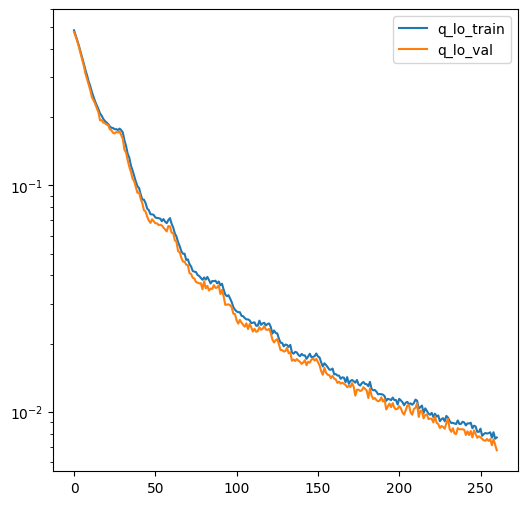

In [3]:
from matplotlib.pylab import f
import matplotlib.pyplot as plt
import torch
from matplotlib.pylab import f
import torch

import matplotlib.pyplot as plt
ind1 = 15  # Specify the desired ind value for the first model
versi1 = 35


fig, ax = plt.subplots(figsize=(6, 6))

# Plot for the first model
path1 = f'/projectnb/tianlabdl/jalido/sbrnet_proj/trained_models/sbrnet_view_{ind1}_v{versi1}.pt'
checkpoint1 = torch.load(path1, map_location=torch.device('cpu'))
print(checkpoint1.keys())
qlo_train = checkpoint1['q_lo_training_loss']
qlo_val = checkpoint1['q_lo_validation_loss']

plt.plot(qlo_train, label='q_lo_train')
plt.plot(qlo_val, label='q_lo_val')
plt.yscale('log')
plt.legend()
print(f"q_lo_train: {qlo_train[-1]}, q_lo_val: {qlo_val[-1]}")

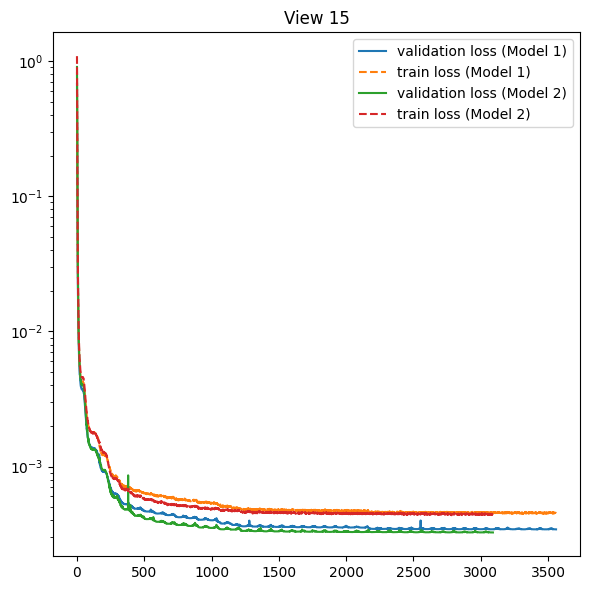

0.00034270459436811505 0.00032503445399925115


In [1]:
from matplotlib.pylab import f
import matplotlib.pyplot as plt
import torch
from matplotlib.pylab import f
import torch

import matplotlib.pyplot as plt
# version number notes. all with ind = 15 all 9 views:
# 7 is OG. lr=1e-3, no weight decay, yes long skip connection
# 8 is with 1e-3 weight decay. 
# 9 is without long skip connection. 
# 10 is with modified resblock. 
# 11 is without long resconnection with lr=1e-4
# 12 is OG with conformal loss
# 13 is with conformal loss 3 layers per head
# 14 is with conformal loss 3 layers per head and fixed last conv layer to be 3 groups too
# 15 is with conformal loss 3 layers per head and fixed last conv layer to be 3 groups too and 18 resblocks instead of 20
# 16 is removed relu after expansion to 3 heads but with 18 resblocks and corrected groups. also batch size of 16
# 17 is same as 16.
# 18 is expansion to 3 heads is conv + relu + bn instead of only conv
# 19 is with .1 and .9 quantiles (18 Resblocks)
# 20 is same as 19 but with 20 resblocks
# 22 is .2 and .8 quantiles (20 Resblocks) and batch size 10
# 23 is .1 and .9 quantiles (20 Resblocks) and batch size 10
# 24 is .1 and .9 quantiles (20 Resblocks) and batch size 10 and 1e-5 learning rate 
# 24 is .1 and .9 quantiles (20 Resblocks) and batch size 10 and 1e-4 learning rate 
# 25 os .1 and .9 quantiles (20 Resblocks) and 1e-5 learning rate and 4 head layers instead of 3
# 26 is .1 and .9 quantiles (20 Resblocks) and 1e-4 learning rate and 4 head layers with res connection in multihead module
# 27 is .45 and .55 quantiles (20 Resblocks) and 1e-4 learning rate and 4 head layers with res connection in multihead module
# 28 is .45 and .55 quantiles (20 Resblocks) and 1e-4 learning rate and 4 head layers without res connection in multihead module (og)
# 29 is .45 and .55 quantiles (20 Resblocks) and 1e-3 learning rate and 4 head layers
# 30 is .45 and .55 quantiles (20 Resblocks) and 1e-3 learning rate and 2 head layers
# 31 is .45 and .55 quantiles (20 Resblocks) and 1e-3 learning rate simple single conv layer like anastasios
# 32 is .1 and .9 quantiles (20 Resblocks) and 1e-3 learning rate simple single conv layer like anastasios
# 33 is .1 and .9 quantiles (20 Resblocks) and 1e-3 learning rate simple single conv layer like anastasios with 10x for qlo_loss weight
# 34 is .1 and .9 quantiles (20 Resblocks) and 1e-3 learning rate simple single conv layer like anastasios with no sigmoid act for quantile heads
# 35 is .1 and .9 quantiles (20 Resblocks) and 1e-3 learning rate simple double conv layer like anastasios with no sigmoid act for quantile heads
# 36 is .1 and .9 quantiles (20 Resblocks) and 1e-4 learning rate simple double conv layer like anastasios with no sigmoid act for quantile heads 1e-4 lr
# 37 is .1 and .9, 20 resblocks, 1e-3 lr, 2 head layers, WITH sigmoid act for all heads, and switch argument place for q_lo
# 38 is .05 and .95, 20 resblocks, 1e-3 lr, 2 head layers, WITH sigmoid act for all heads, and switch argument place for q_lo
# 39 is .05 and .95, 20 resblocks, 1e-3 lr, 2 head layers, WITH sigmoid act for all heads, and switch argument place for q_lo, MAE loss for point
# 40 is .05 and .95, 20 resblocks, 1e-3 lr, 2 head layers, WITH sigmoid act for all heads, and switch argument place for q_lo, bce loss for point. fixed group bug
# 41 is .2 and .8, 17 resblocks, 1e-3 lr, 4 head layers, WITH sigmoid act for all heads, and NO switch argument place for q_lo, bce loss for point. fixed group bug
# 46 is .2 and .8, 17 resblocks, 1e-3 lr, 4 head layers, WITH relu act for quantile heads

##########
# 0 is sigmoid act
# 1 is relu act 
# 2 is sigmoid act but only q_lo has non-zero loss weight. 
# 3 is resnext. 4 head layers, sigmoid and qLo only

ind1 = 15  # Specify the desired ind value for the first model
versi1 = 25
ind2 = 15  # Specify the desired ind value for the second model
versi2 = 26

fig, ax = plt.subplots(figsize=(6, 6))

# Plot for the first model
path1 = f'/projectnb/tianlabdl/jalido/sbrnet_proj/trained_models/sbrnet_view_{ind1}_v{versi1}.pt'
checkpoint1 = torch.load(path1, map_location=torch.device('cpu'))
validation_loss1 = checkpoint1['validation_losses']
train_loss1 = checkpoint1['training_losses']

title1 = f"Length of train_loss: {len(train_loss1)}, Lowest Validation Loss: {round(min(validation_loss1), 4)}, Lowest Train Loss: {round(min(train_loss1), 4)}"
title1 = f"View {ind1}"
ax.set_title(title1)
ax.plot(validation_loss1, label='validation loss (Model 1)')
ax.plot(train_loss1, label='train loss (Model 1)', linestyle='--')  # Set linestyle to '--' for dashed line

# Plot for the second model
path2 = f'/projectnb/tianlabdl/jalido/sbrnet_proj/trained_models/sbrnet_view_{ind2}_v{versi2}.pt'
checkpoint2 = torch.load(path2, map_location=torch.device('cpu'))
validation_loss2 = checkpoint2['validation_losses']
train_loss2 = checkpoint2['training_losses']

title2 = f"Length of train_loss: {len(train_loss2)}, Lowest Validation Loss: {round(min(validation_loss2), 4)}, Lowest Train Loss: {round(min(train_loss2), 4)}"
title2 = f"View {ind2}"
ax.set_title(title2)
ax.plot(validation_loss2, label='validation loss (Model 2)')
ax.plot(train_loss2, label='train loss (Model 2)', linestyle='--')  # Set linestyle to '--' for dashed line

ax.legend()
ax.set_yscale('log')
# ax.set_ylim(0.0001, 0.001)

plt.tight_layout()
plt.show()
print(validation_loss1[-1], validation_loss2[-1])

In [2]:
from pandas import read_parquet

p = '/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/1/metadata.pq'

df = read_parquet(p)
df[df['sbr']<1.15]


,num_views,view_combo,psf_path,lens_apodized_path,mla_apodized_path,gt_folder,value_path,sbr,sbr_range,stack_scat_path,rfv_scat_path,stack_free_path,rfv_free_path,gt_path
80,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.120967,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
162,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.120094,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
192,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.148183,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
226,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.143458,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
229,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.135918,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
230,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.124672,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
365,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.143775,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
375,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_c

# quick test

In [13]:
from pandas import read_parquet
df = read_parquet("/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/6/test_metadata.pq")
len(df)

200

In [1]:
print('hey')
import sys
sys.path.append("/projectnb/tianlabdl/jalido/sbrnet_proj/sbrnet_core/")

hey
The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [1]:
%load_ext autoreload
%autoreload 2
from sbrnet_core.sbrnet.calibration.rcps import algorithm
from sbrnet_core.sbrnet.dataset import CustomDataset
from sbrnet_core.sbrnet.models.model import SBRNet
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
view_ind = 15
versi = 38
config = {
    "dataset_pq": f"/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/{view_ind}/test_metadata.pq",
    "scattering": "scat",
    "train_split": 0.8,
    "batch_size": 2,
    "learning_rate": 0.001,
    "epochs": 20000,
    "backbone": "resnet",
    "resnet_channels": 48,
    "weight_init": "kaiming_normal",
    "random_seed": 42,
    "optimizer": "adam",
    "criterion_name": "bce_with_logits",
    "use_amp": True,
    "lr_scheduler": "cosine_annealing_with_warm_restarts",
    "weight_decay": 0.001,
    "cosine_annealing_T_max": 100,
    "q_lo": 0.05,
    "q_hi": 0.95,
    "num_gt_layers": 24,
    "num_lf_views": 9,
    "num_rfv_layers": 24,
    "num_resblocks": 20,
    "patch_size": 224,
    "last_layer": "quantile_heads",
    "num_head_layers": 2,
    "view_ind": view_ind,
}

cal_data = CustomDataset(config)
model = SBRNet(config).to(device)
checkpoint = torch.load(f'/projectnb/tianlabdl/jalido/sbrnet_proj/trained_models/sbrnet_view_{view_ind}_v{versi}.pt',map_location=torch.device('cpu'))

mod_state_dict = checkpoint['model_state_dict']
for key in list(mod_state_dict.keys()):
    mod_state_dict[key.replace("_orig_mod.", "")] = mod_state_dict.pop(key)
model.load_state_dict(mod_state_dict)
# lambdas = algorithm(cal_data=cal_data, model=model, alpha=0.1, delta=0.1, lamb_0=10*torch.ones(24).cuda(), d_lamb=0.08, params=config)
# lambdas

cuda


<All keys matched successfully>

In [7]:
df = read_parquet(config["dataset_pq"])
df

,num_views,view_combo,lens_apodized_path,mla_apodized_path,gt_folder,value_path,sbr,sbr_range,stack_scat_path,rfv_scat_path,stack_free_path,rfv_free_path,gt_path
0,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,2.907430,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
1,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.480704,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
2,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.681258,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
3,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.326393,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
4,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,2.791504,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,2.250458,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
196,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,2.882084,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
197,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,2.356133,1.1-3.0,/ad/eng/research/e

In [2]:
import os
from functools import cached_property, cache
from typing import Tuple
from pandas import DataFrame, read_parquet

import numpy as np
import torch
import zarr
from tifffile import imread, TiffFile
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from sbrnet_core.sbrnet.calibration.rcps import get_preds
stack, rfv, gt = cal_data[2]
qlo, qhi, f = get_preds(model, stack[None,:,:,:].to(device), rfv[None,:,:,:].to(device), config)
gt, qlo, qhi, f = gt.cpu().numpy().squeeze(), qlo.cpu().numpy().squeeze(), qhi.cpu().numpy().squeeze(), f.cpu().numpy().squeeze()
# qlo, qhi, f = qlo/np.max(qhi), qhi/np.max(qhi), f/np.max(qhi)


/projectnb/tianlabdl/jalido/sbrnet_proj/.direnv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/projectnb/tianlabdl/jalido/sbrnet_proj/.direnv/lib/python3.11/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)


Text(0, 0.5, 'uncalibrated depth-wise uncertainty. abs(qhi - qlo)')

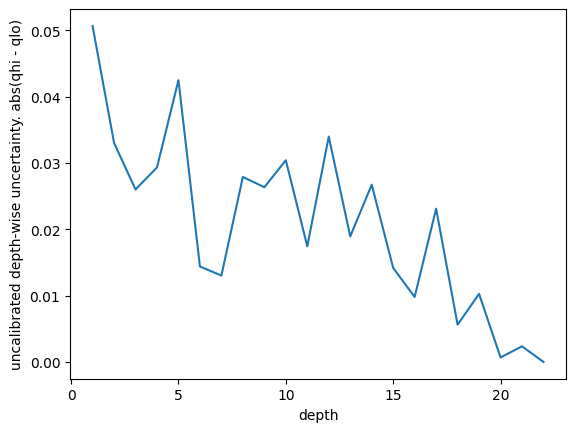

In [5]:
d_err = []
for i in range(24):
    unc = np.abs(qhi[i].ravel()- qlo[i].ravel())
    # unc = np.abs(gt[i].ravel() - f[i].ravel())
    mask = (gt[i].ravel() != 0) & (f[i].ravel() != 0)
    unc = unc[mask]
    d_err.append(np.mean(unc))

plt.plot(d_err)
plt.xlabel("depth")
plt.ylabel("uncalibrated depth-wise uncertainty. abs(qhi - qlo)")

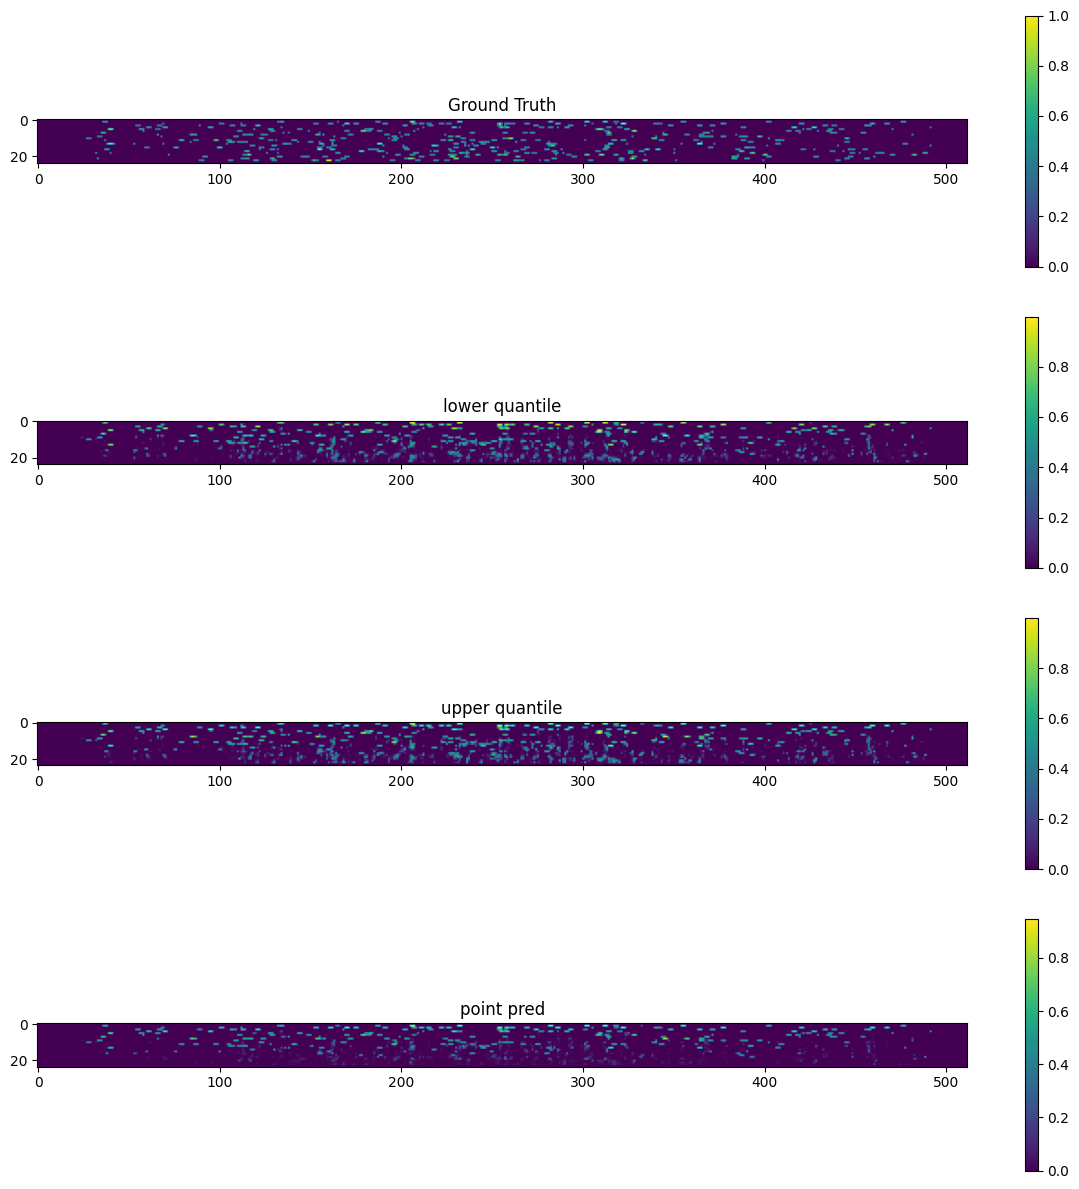

: 

In [3]:
fig, axs = plt.subplots(4,1, figsize=(15, 15))
axs = axs.ravel()
q = 1
im0 = axs[0].imshow(np.max(gt, axis=q))
axs[0].set_title("Ground Truth")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(np.max(qlo, axis=q))
axs[1].set_title("lower quantile")
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.max(qhi, axis=q))
axs[2].set_title("upper quantile")
fig.colorbar(im2, ax=axs[2])

im3 = axs[3].imshow(np.max(f, axis=q))
axs[3].set_title("point pred")
fig.colorbar(im3, ax=axs[3])


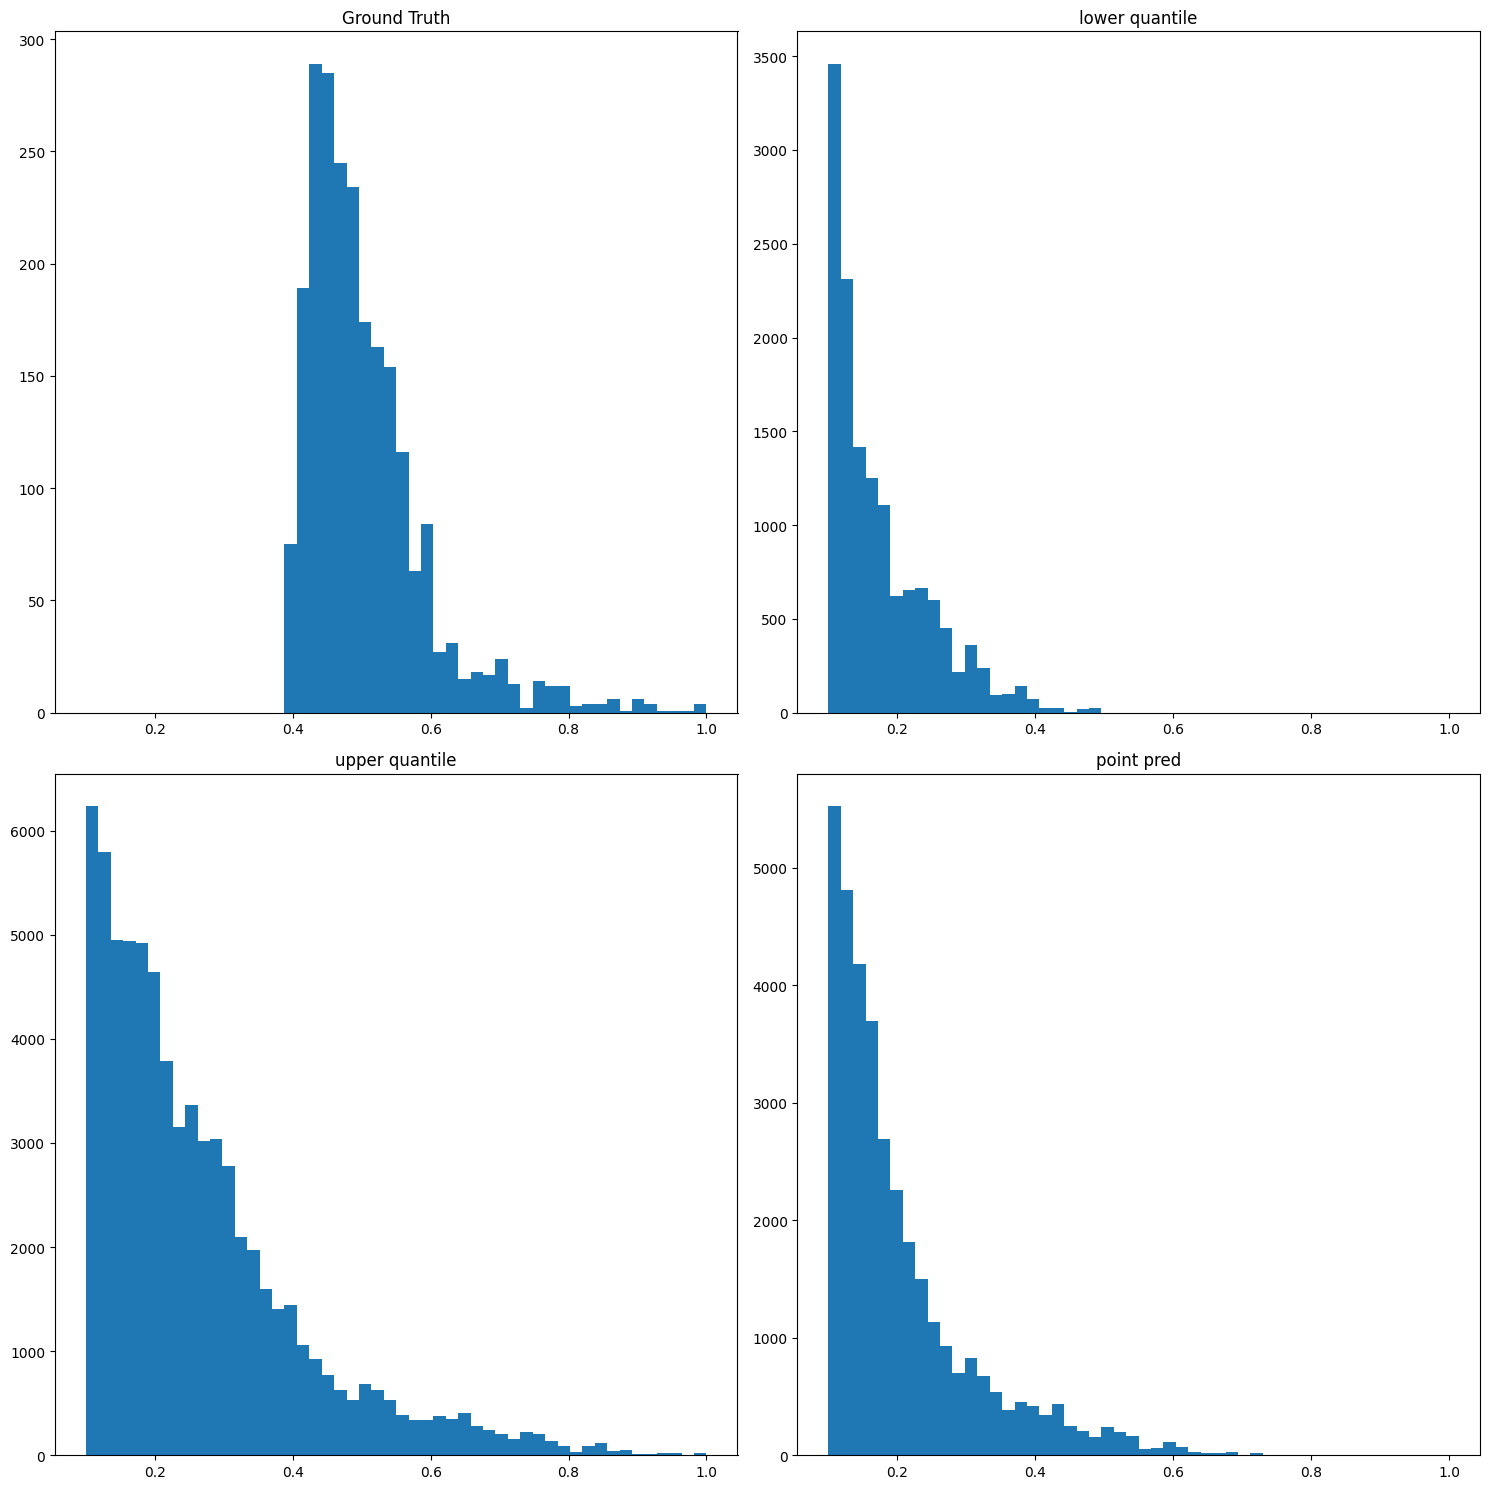

: 

In [11]:
fig, axs = plt.subplots(2,2, figsize=(15, 15))
axs = axs.ravel()
lowe = 0.1
axs[0].hist(gt.flatten(), bins=50, range=(lowe, 1))
axs[0].set_title("Ground Truth")

axs[1].hist(qlo.flatten(), bins=50, range=(lowe, 1))
axs[1].set_title("lower quantile")

axs[2].hist(qhi.flatten(), bins=50, range=(lowe, 1))
axs[2].set_title("upper quantile")

axs[3].hist(f.flatten(), bins=50, range=(lowe, 1))
axs[3].set_title("point pred")

plt.tight_layout()
plt.show()


In [9]:
num_elements_between = (gt >= qlo) & (gt <= qhi)
        
num_elements_between

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

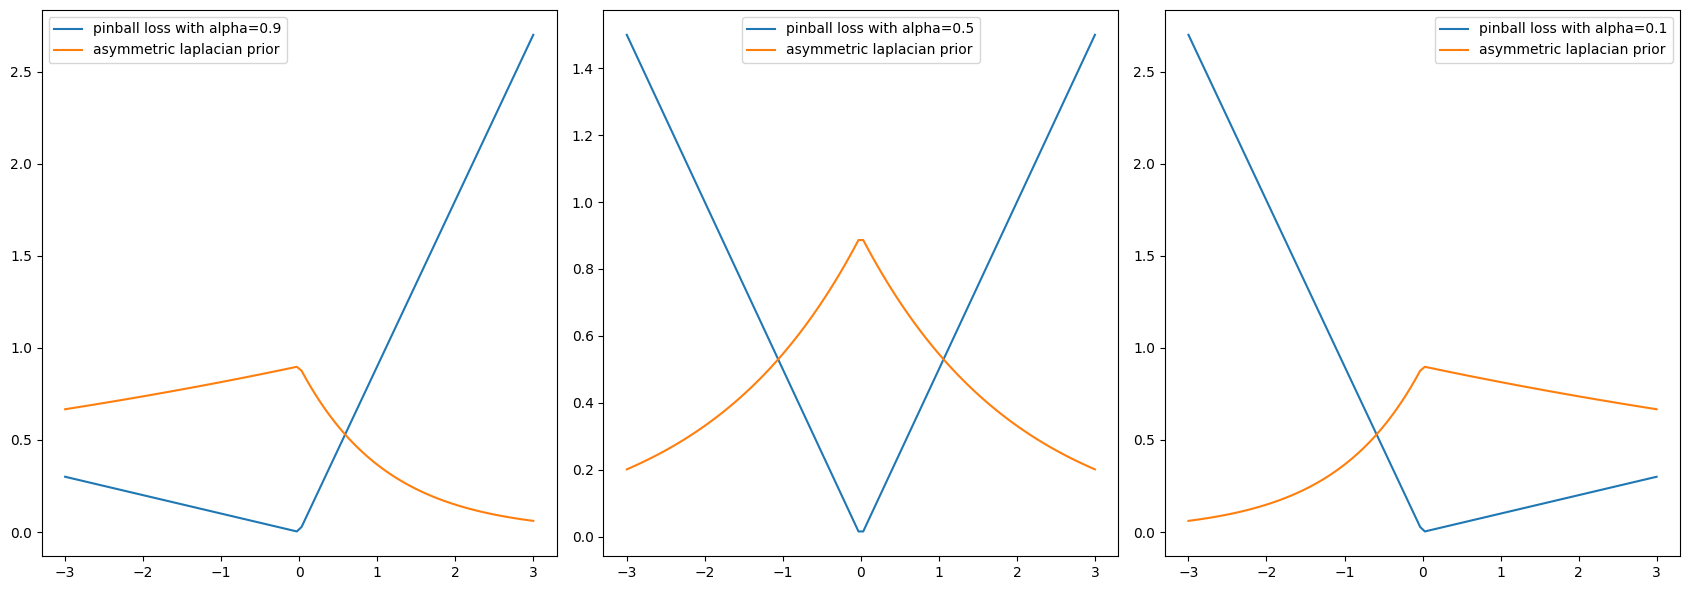

In [44]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(17, 6))
axs = axs.ravel()

alphas = [0.9, .5, 0.1]
theta = 0.1
for i in range(3):
    alpha = alphas[i]
    x = np.linspace(-3, 3, 100)
    f = alpha * abs(x) * (x >= 0) + (1-alpha) * abs(x) * (x < 0)
    pdf = theta * (1-theta) * np.exp(-f)*10
    axs[i].plot(x, f, label=f"pinball loss with alpha={alpha}")
    axs[i].plot(x, pdf, label=f"asymmetric laplacian prior")
    axs[i].legend()

plt.tight_layout()
plt.show()


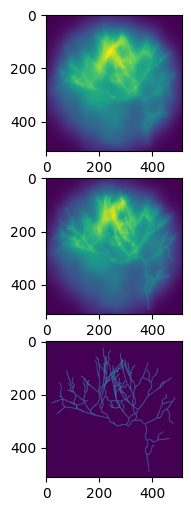

In [5]:
from pandas import read_parquet
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
from scipy.ndimage import zoom
df = read_parquet("/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/vasc/15/metadata.pq")

fig, axs = plt.subplots(3,1, figsize=(17, 6))
path = df["rfv_scat_path"].iloc[1]
vol = imread(path)
mip = np.max(vol, axis=0)
axs[0].imshow(mip)

path = df["stack_scat_path"].iloc[1]
vol = imread(path)
mip = np.max(vol, axis=0)
axs[1].imshow(mip)

path = df["gt_path"].iloc[1]
vol = imread(path)
mip = np.max(vol, axis=0)
axs[2].imshow(mip)
